<h2>Simulation and analysis of the card game "No Thanks"</h2>

Import game simulator code from Table.py. Also import numpy for data analysis and matpltlib for plots.

In [1]:
%matplotlib inline

from table import Table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from statistics import mean, median_low

Select the number of players and the number of games to simulate.

In [2]:
num_players = 3
num_games = 10000

Run the simulation and collect the data.

In [3]:
game_data = []
for i in range(num_games):
    mytable = Table(num_ai_players=num_players, verbose=0)
    mytable.play()
    game_data.append(mytable.score())

The output of Table.score() is a list of lists containing the following data for each player in the game:

<table>
   <tr>
      <td>Index</td> <td>Description</td>
   </tr>
   <tr>
      <td><div align="center">0</div></td> <td>Lost = 0<br>Won = 1<br>Tied = 2</td>
   </tr>
   <tr>
      <td><div align="center">1</div></td> <td>Player position, indexed from 0 (i.e. the player who went first has position 0)</td>
   </tr>
   <tr>
      <td><div align="center">2</div></td> <td>Final score (int)</td>
   </tr>
   <tr>
      <td><div align="center">3</div></td> <td>Initial threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">4</div></td> <td>Token threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">5</div></td> <td>Effective value threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">6</div></td> <td>Pot threshold (int)</td>
   </tr>
   <tr>
      <td><div align="center">7</div></td> <td>Token history (list of ints)</td>
   </tr>
   <tr>
      <td><div align="center">8</div></td> <td>Effective value history (list of ints)</td>
   </tr>
   <tr>
       <td><div align="center">9</div></td> <td>Player's cards, in the order in which they were obtained (list of ints)</td>
   </tr>
</table>

Remove (pop) the list of cards from every player's data, separating them into a list of winning hands and a list of losing hands.

In [4]:
winning_cards = []
losing_cards = []
for game in game_data:
    for player_data in game:
        if player_data[0] > 0:
            winning_cards.append(player_data.pop())
        else:
            losing_cards.append(player_data.pop())

Do winning players tend to take more or fewer cards than losing players?

Average number of cards in winning hands: 7.61463462674808 
Average number of cards in losing hands: 8.197168195102288 

Median number of cards in winning hands: 7 
Median number of cards in losing hands: 8


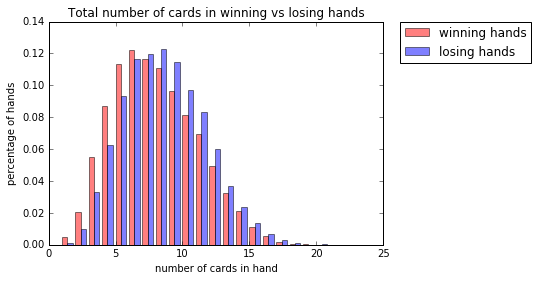

In [6]:
num_win = len(winning_cards)
num_lose = len(losing_cards)
win_len = []
lose_len = []
for hand in winning_cards:
    win_len.append(len(hand))
for hand in losing_cards:
    lose_len.append(len(hand))
print("Average number of cards in winning hands:", mean(win_len), \
      "\nAverage number of cards in losing hands:", mean(lose_len), \
      "\n\nMedian number of cards in winning hands:", median_low(win_len), \
      "\nMedian number of cards in losing hands:", median_low(lose_len))
win_len_ctr = Counter()
lose_len_ctr = Counter()
for ct in win_len:
    win_len_ctr[ct] += 1
for ct in lose_len:
    lose_len_ctr[ct] += 1
win_labels, win_values = zip(*win_len_ctr.items())
lose_labels, lose_values = zip(*lose_len_ctr.items())
bar_width = 0.4
opacity = 0.5
win_len_plt = plt.bar(win_labels, [value / num_win for value in win_values], bar_width, alpha=opacity, color='r', \
                     label='winning hands')
lose_len_plt = plt.bar([label + bar_width for label in lose_labels], [value / num_lose for value in lose_values], \
                      bar_width, alpha=opacity, color='b', label='losing hands')
plt.xlabel('number of cards in hand')
plt.ylabel('percentage of hands')
plt.title('Total number of cards in winning vs losing hands')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<em>In 10,000 three-player games, I find that winning players end up with slightly fewer cards than losing players (avg 7.6 vs. 8.2, median 7 vs 8).</em>

Visualize the distribution of cards in winning and losing final hands: calculate and plot the percent of hands that contain each card (3-35).

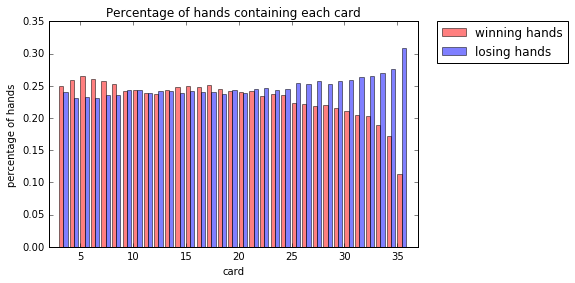

In [7]:
card_counts_win = Counter()
card_counts_lose = Counter()
for hand in winning_cards:
    for card in hand:
        card_counts_win[card] += 1
for hand in losing_cards:
    for card in hand:
        card_counts_lose[card] += 1
win_labels, win_values = zip(*card_counts_win.items())
lose_labels, lose_values = zip(*card_counts_lose.items())
bar_width = 0.4
opacity = 0.5
win_plt = plt.bar(win_labels, [value / num_win for value in win_values], bar_width, alpha=opacity, color='r', \
                  label='winning hands')
lose_plt = plt.bar([label + bar_width for label in lose_labels], [value / num_lose for value in lose_values], \
                   bar_width, alpha=opacity, color='b', label='losing hands')
plt.xlabel('card')
plt.ylabel('percentage of hands')
plt.title('Percentage of hands containing each card')
plt.xlim((2,37))
#plt.xticks([label + bar_width for label in lose_labels], lose_labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

<em>The difference between winning and losing hands is striking for card values greater than ~26. Winning hands are much less likely to contain high-valued cards. The percentage of winning hands containing the 35 is less than a third of the percentage of losing hands containing the 35.</em>

Create a Numpy array and a Pandas data frame of player attributes.

In [10]:
slice = []
for game in game_data:
    for player in game:
        slice.append(player[:7])
attributes = np.array(slice)
df = pd.DataFrame(data=attributes, \
                  columns=['won', 'pos', 'score', 'init_thr', 'tok_thr', 'eff_val_thr', 'pot_thr'])

Descibe attributes of winners (including ties).

In [11]:
df[df['won'] > 0].describe()

,won,pos,score,init_thr,tok_thr,eff_val_thr,pot_thr
count,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000,10154.000000
mean,1.030333,1.003644,32.290723,17.849222,4.258125,4.415403,12.867540
std,0.171510,0.816750,14.524892,9.076441,2.549586,2.572112,4.237656
min,1.000000,0.000000,-17.000000,3.000000,0.000000,0.000000,6.000000
25%,1.000000,0.000000,23.000000,10.000000,2.000000,2.000000,9.000000
50%,1.000000,1.000000,32.000000,17.000000,4.000000,5.000000,13.000000
75%,1.000000,2.000000,42.000000,26.000000,6.000000,7.000000,16.000000
max,2.000000,2.000000,86.000000,34.000000,8.000000,8.000000,20.000000


Describe attributes of losers.

In [12]:
df[df['won'] == 0].describe()

,won,pos,score,init_thr,tok_thr,eff_val_thr,pot_thr
count,19846,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000
mean,0,0.998136,71.416658,18.829638,3.840069,3.781467,13.076086
std,0,0.816402,27.165343,9.321759,2.576933,2.551117,4.354724
min,0,0.000000,5.000000,3.000000,0.000000,0.000000,6.000000
25%,0,0.000000,52.000000,11.000000,2.000000,2.000000,9.000000
50%,0,1.000000,66.000000,19.000000,4.000000,4.000000,13.000000
75%,0,2.000000,85.000000,27.000000,6.000000,6.000000,17.000000
max,0,2.000000,207.000000,34.000000,8.000000,8.000000,20.000000


Does player position confer an advantage?

In [20]:
won_pos = df[df['won'] > 0]['pos'].value_counts(sort=False).to_frame()
won_pos.columns = ['count']
won_pos['percent'] = 100 * won_pos['count'] / won_pos['count'].sum()
won_pos

,count,percent
0,3368,33.169194
1,3381,33.297223
2,3405,33.533583


In [19]:
lose_pos = df[df['won'] == 0]['pos'].value_counts(sort=False).to_frame()
lose_pos.columns = ['count']
lose_pos['percent'] = 100 * lose_pos['count'] / lose_pos['count'].sum()
lose_pos

,count,percent
0,6632,33.417313
1,6619,33.351809
2,6595,33.230878


<em>Player positions are evenly distributed. Position does not appear to confer any significant advantage.</em>